# Análisis Exploratorio de Datos. 
## dataset: New York City Airbnb Open Data

### Se realiza análisis exploratorio de datos. Del data de Airbnb del año 2019 en la ciudad de Nueva York.



# Importa Librerias

In [1]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from matplotlib import pylab
from pylab import *

%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


# Leyendo Data Set usando Pandas

In [2]:
Airbnb_NYC = pd.read_csv('AB_NYC_2019.csv', header =1) # dataset original
Airbnb2_NYC = pd.read_csv('AB_NYC_20192.csv', header =1) # dataset modificado se agrego un punto. 
#En lugar de comas a fechas, y se borran las filas donde los atributos last review y review per months son cero.
#Se agrega atributo last review days donde se calcula la cantidad de dias desde la fecha en last review.


# Analisis

In [3]:
# Airbnb_NYC head
Airbnb_NYC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#Información de columnas y tipo de datos de cada variable, se nota como en last_review y reviews per month tienen valores cero.
Airbnb_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
Airbnb_NYC['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [6]:
# Se inicia limpieza de datos: se eliminan filas cero en last review y reeviews per month, se agrega last_review_days.
Airbnb2_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38843 entries, 0 to 38842
Data columns (total 17 columns):
id                                38843 non-null int64
name                              38837 non-null object
host_id                           38843 non-null int64
host_name                         38827 non-null object
neighbourhood_group               38843 non-null object
neighbourhood                     38843 non-null object
latitude                          38843 non-null object
longitude                         38843 non-null object
room_type                         38843 non-null object
minimum_nights                    38843 non-null int64
number_of_reviews                 38843 non-null int64
last_review                       38843 non-null object
last_review_days                  38843 non-null int64
reviews_per_month                 38843 non-null object
calculated_host_listings_count    38843 non-null int64
availability_365                  38843 non-null int64
pr

In [7]:
Airbnb2_NYC['price'].describe()

count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [8]:
#Se eliminan filas con valor de precio igual a cero
indexNames = Airbnb2_NYC[ Airbnb2_NYC['price'] == 0 ].index

Airbnb2_NYC.drop(indexNames , inplace=True)

Airbnb2_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38833 entries, 0 to 38842
Data columns (total 17 columns):
id                                38833 non-null int64
name                              38827 non-null object
host_id                           38833 non-null int64
host_name                         38817 non-null object
neighbourhood_group               38833 non-null object
neighbourhood                     38833 non-null object
latitude                          38833 non-null object
longitude                         38833 non-null object
room_type                         38833 non-null object
minimum_nights                    38833 non-null int64
number_of_reviews                 38833 non-null int64
last_review                       38833 non-null object
last_review_days                  38833 non-null int64
reviews_per_month                 38833 non-null object
calculated_host_listings_count    38833 non-null int64
availability_365                  38833 non-null int64
pr

In [9]:
Airbnb2_NYC['price'].describe()

count    38833.000000
mean       142.354595
std        196.957737
min         10.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, "Distribution of users' prices")

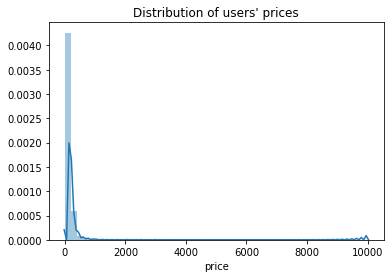

In [10]:
# Distribución de densidad en el precio.
price_dist = sns.distplot(Airbnb2_NYC['price'].dropna())
price_dist.set_title("Distribution of users' prices")

In [11]:
# Se eliminan filas con valor Z mayor a 3
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(Airbnb2_NYC['price']))
print(z)
threshold = 3

indexNames2 = np.where(z > 3)
print(indexNames2)

Airbnb2_NYC['zscore']=z

indexNames2= Airbnb2_NYC[Airbnb2_NYC['zscore'] > 3 ].index


Airbnb2_NYC.drop(indexNames2,inplace=True)


Airbnb2_NYC.info()




[0.36736575 0.7953352  0.2912063  ... 0.41813872 0.56030303 0.39275224]
(array([  413,   754,   850,   949,   956,   969,  1058,  1166,  1190,
        1308,  1360,  1410,  1446,  1447,  1459,  1492,  1506,  1522,
        1561,  1574,  1607,  1617,  1684,  1703,  1704,  1708,  1715,
        1758,  1763,  1768,  1865,  1884,  1886,  1907,  1914,  1919,
        1933,  1975,  2059,  2066,  2078,  2099,  2105,  2128,  2153,
        2162,  2170,  2184,  2187,  2359,  2420,  2521,  2527,  2652,
        2674,  2732,  2764,  2841,  2904,  2909,  2914,  2929,  2939,
        3096,  3111,  3118,  3142,  3241,  3242,  3283,  3299,  3449,
        3678,  3701,  3860,  3903,  4038,  4050,  4267,  4374,  4412,
        4530,  4644,  4747,  4751,  4754,  4756,  4769,  4775,  4777,
        4856,  5049,  5131,  5160,  5216,  5287,  5290,  5317,  5333,
        5371,  5372,  5439,  5546,  5741,  5762,  5795,  5816,  5834,
        5845,  5900,  5910,  6201,  6232,  6489,  6537,  6547,  6668,
        6702,  67

Text(0.5, 1.0, "Distribution of users' prices")

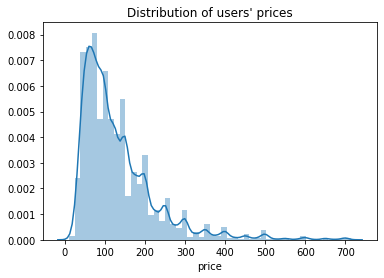

In [12]:
#Distribución de densidad de la variable precio "price", luego de eliminar filas valor zscore mayor a 3.
price_dist2 = sns.distplot(Airbnb2_NYC['price'].dropna())
price_dist2.set_title("Distribution of users' prices")

In [13]:
# Se calcula el IQR para filtar los datos más por sobre cuartil 3 y por debajo del cuartil 1, 150% de la diferencia entre ambos.
Q1 = Airbnb2_NYC['price'].quantile(0.25)
Q3 = Airbnb2_NYC['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
iqqr=np.abs(Airbnb2_NYC['price'] < (Q1 - 1.5 * IQR)) |(Airbnb2_NYC['price'] > (Q3 + 1.5 * IQR))

print(np.where(iqqr == True))

print(iqqr[115])

#threshold = 3
#print(np.where(z > 3))
#print(iqqr==True)

Airbnb2_NYC['iqqr']=iqqr

indexNames3= Airbnb2_NYC[Airbnb2_NYC['iqqr'] == True ].index
# Delete these row indexes from dataFrame

#print(indexNames)
Airbnb2_NYC.drop(indexNames3,inplace=True)


Airbnb2_NYC.info()





98.0
(array([  115,   312,   405, ..., 38352, 38366, 38456], dtype=int64),)
True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36702 entries, 0 to 38842
Data columns (total 19 columns):
id                                36702 non-null int64
name                              36696 non-null object
host_id                           36702 non-null int64
host_name                         36686 non-null object
neighbourhood_group               36702 non-null object
neighbourhood                     36702 non-null object
latitude                          36702 non-null object
longitude                         36702 non-null object
room_type                         36702 non-null object
minimum_nights                    36702 non-null int64
number_of_reviews                 36702 non-null int64
last_review                       36702 non-null object
last_review_days                  36702 non-null int64
reviews_per_month                 36702 non-null object
calculated_host_listings_count 

Text(0.5, 1.0, "Distribution of users' prices")

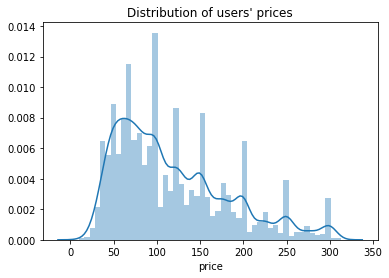

In [14]:
# Distribución de valor precio luego de la limpieza de datos.
price_dist = sns.distplot(Airbnb2_NYC['price'].dropna())
price_dist.set_title("Distribution of users' prices")

In [15]:
#4067 usuarios con más de un espacio de alquiler.

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

Airbnb2_NYC.groupby(
   'host_id',as_index=True
).agg(
    
         Cantidad_de_locales=('host_id',"count"),    # cuenta la cantidad de ids que tiene un mismo host.
         Precio_Promedio=('price', "mean"),  # toma el promedio de los valores de precio para cada id, o espacio de renta de cada host.
         Precio_Minimo=('price', min),  # toma precio minimo, máximo y percentiles.
         Precio_Maximo=('price', max), 
         Precio_desv_estamdar=('price', std),
         Precio_25=('price',percentile(25)),
         Precio_50=('price',percentile(50)),
         Precio_75=('price',percentile(75))
).sort_values("Cantidad_de_locales",ascending=False).head(4068)




,Cantidad_de_locales,Precio_Promedio,Precio_Minimo,Precio_Maximo,Precio_desv_estamdar,Precio_25,Precio_50,Precio_75
host_id,,,,,,,,
219517861,163,224.509202,100,308,28.489194,214.00,229.0,242.50
61391963,79,144.620253,109,200,22.822787,125.00,142.0,159.00
16098958,57,185.964912,117,310,44.748889,160.00,175.0,197.00
137358866,51,43.823529,31,76,11.126016,36.00,39.0,51.00
7503643,49,149.408163,129,199,22.169723,129.00,149.0,159.00
...,...,...,...,...,...,...,...,...
186586297,2,149.500000,99,200,71.417785,124.25,149.5,174.75
815977,2,227.500000,220,235,10.606602,223.75,227.5,231.25
2881,2,58.500000,52,65,9.192388,55.25,58.5,61.75


In [16]:
#4067 usuarios con más de un espacio de alquiler mas baratos

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

k=Airbnb2_NYC.groupby(
   'host_id',as_index=True
).agg(
    
         Cantidad_de_locales=('host_id',"count"),    # cuenta la cantidad de ids que tiene un mismo host.
         Precio_Promedio=('price', "mean"),  # toma el promedio de los valores de precio para cada id, o espacio de renta de cada host.
         Precio_Minimo=('price', min),  # toma precio minimo, máximo y percentiles.
         Precio_Maximo=('price', max), 
         Precio_desv_estamdar=('price', std),
         Precio_25=('price',percentile(25)),
         Precio_50=('price',percentile(50)),
         Precio_75=('price',percentile(75))
).sort_values("Cantidad_de_locales",ascending=False).head(4067)
k.sort_values("Precio_Promedio",ascending=True).head(10)


,Cantidad_de_locales,Precio_Promedio,Precio_Minimo,Precio_Maximo,Precio_desv_estamdar,Precio_25,Precio_50,Precio_75
host_id,,,,,,,,
182488531,2,18.000000,15,21,4.242641,16.50,18.0,19.50
129022496,2,20.000000,20,20,0.000000,20.00,20.0,20.00
158178970,3,20.666667,13,27,7.094599,17.50,22.0,24.50
1532337,4,21.250000,20,25,2.500000,20.00,20.0,21.25
137501374,3,24.000000,19,28,4.582576,22.00,25.0,26.50
201813482,3,25.000000,25,25,0.000000,25.00,25.0,25.00
179478172,2,25.000000,25,25,0.000000,25.00,25.0,25.00
223087887,7,25.285714,24,29,1.704336,24.50,25.0,25.00
144119993,2,25.500000,21,30,6.363961,23.25,25.5,27.75


In [17]:
#Localidades para alquiler por ciudad e información de distribución de precios, ordenado por precio promedio.


Airbnb2_NYC.groupby(
   'neighbourhood_group',as_index=True
).agg(
    
         Cantidad_de_locales=('neighbourhood_group',"count"),    # cuenta la cantidad de ids que tiene cada ciudad.
         Precio_Promedio=('price', "mean"),  # toma el promedio de los valores de precio para ciudad
         Precio_Minimo=('price', min),   # toma precio minimo, máximo y percentiles.
         Precio_Maximo=('price', max),
         Precio_desv_estamdar=('price', std),
         Precio_25=('price',percentile(25)),
         Precio_50=('price',percentile(50)),
         Precio_75=('price',percentile(75))
).sort_values("Precio_Promedio",ascending=False)

,Cantidad_de_locales,Precio_Promedio,Precio_Minimo,Precio_Maximo,Precio_desv_estamdar,Precio_25,Precio_50,Precio_75
neighbourhood_group,,,,,,,,
Manhattan,15144,140.808637,10,313,66.307569,89,130.0,187
Brooklyn,15875,105.671181,10,312,59.121810,60,90.0,140
Queens,4507,87.590415,10,300,51.982260,50,70.0,105
Staten Island,312,87.163462,13,300,55.389897,50,73.5,105
Bronx,864,74.751157,20,309,44.516346,45,63.0,90


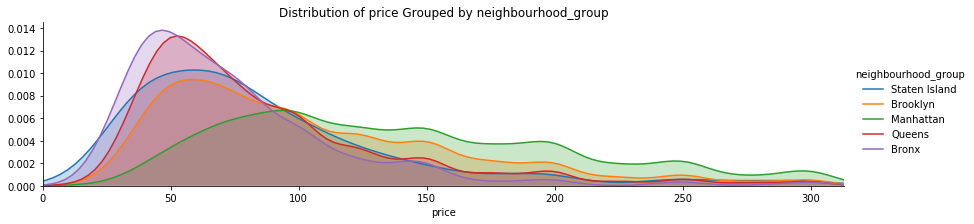

In [18]:
fig = sns.FacetGrid(Airbnb2_NYC, hue='neighbourhood_group', aspect=4)
fig.map(sns.kdeplot, 'price', shade=True)
oldest = Airbnb2_NYC['price'].max()
#oldest = 500
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of price Grouped by neighbourhood_group')
fig.add_legend()

In [19]:
#Localidades para alquiler por barrio e información de distribución de precios. 10 precios promedios más altos.

Airbnb2_NYC.groupby(
   'neighbourhood',as_index=True
).agg(
    
         Cantidad_de_locales=('neighbourhood',"count"),    # cuenta la cantidad de ids que tiene cada barrio.
         Precio_Promedio=('price', "mean"),  # toma el promedio de los valores de precio para barrio.
         Precio_Minimo=('price', min),  # toma precio minimo, máximo y percentiles.
         Precio_Maximo=('price', max),
         Precio_desv_estamdar=('price', std),
         Precio_25=('price',percentile(25)),
         Precio_50=('price',percentile(50)),
         Precio_75=('price',percentile(75))
).sort_values("Precio_Promedio",ascending=False).head(10)

,Cantidad_de_locales,Precio_Promedio,Precio_Minimo,Precio_Maximo,Precio_desv_estamdar,Precio_25,Precio_50,Precio_75
neighbourhood,,,,,,,,
Willowbrook,1,249.000000,249,249,NaN,249.00,249.0,249.00
Neponsit,2,237.000000,200,274,52.325902,218.50,237.0,255.50
Breezy Point,2,195.000000,195,195,0.000000,195.00,195.0,195.00
Tribeca,64,194.828125,60,305,72.746910,137.50,200.0,250.25
NoHo,42,192.214286,75,299,60.492909,152.50,190.0,242.25
Flatiron District,43,191.534884,65,305,68.456920,127.00,200.0,242.50
West Village,523,190.403442,50,310,59.035509,150.00,190.0,237.00
Financial District,438,183.114155,35,309,58.761557,139.25,195.0,229.00
Castleton Corners,2,182.000000,65,299,165.462987,123.50,182.0,240.50


In [20]:
#Localidades para alquiler por barrio e información de distribución de precios. 10 precios promedios más bajos.

Airbnb2_NYC.groupby(
   'neighbourhood',as_index=True
).agg(
    
         Cantidad_de_locales=('neighbourhood',"count"),    # cuenta la cantidad de ids que tiene cada barrio.
         Precio_Promedio=('price', "mean"),  # toma el promedio de los valores de precio para barrio.
         Precio_Minimo=('price', min),  # toma precio minimo, máximo y percentiles.
         Precio_Maximo=('price', max),
         Precio_desv_estamdar=('price', std),
         Precio_25=('price',percentile(25)),
         Precio_50=('price',percentile(50)),
         Precio_75=('price',percentile(75))
).sort_values("Precio_Promedio",ascending=True).head(10)

,Cantidad_de_locales,Precio_Promedio,Precio_Minimo,Precio_Maximo,Precio_desv_estamdar,Precio_25,Precio_50,Precio_75
neighbourhood,,,,,,,,
New Dorp Beach,2,38.000000,36,40,2.828427,37.00,38.0,39.00
Little Neck,3,42.333333,32,50,9.291573,38.50,45.0,47.50
Bull's Head,3,48.000000,25,80,28.583212,32.00,39.0,59.50
Tremont,10,49.900000,25,150,35.874627,38.00,40.5,44.25
Corona,58,51.724138,23,149,29.191319,35.25,40.0,60.00
Hunts Point,16,51.812500,35,150,28.591884,37.00,40.0,59.25
Bronxdale,16,51.875000,25,80,16.899211,40.00,47.5,62.50
Soundview,13,52.846154,28,103,20.342264,45.00,45.0,50.00
Olinville,2,53.000000,26,80,38.183766,39.50,53.0,66.50


In [21]:
#Precios por tipo de alquiler, cuarto compartido, privado y apartamento completo.

Airbnb2_NYC.groupby(
   'room_type',as_index=True
).agg(
    
         Cantidad_de_locales=('room_type',"count"),    # cuenta la cantidad de ids que tiene un mismo host.
         Precio_Promedio=('price', "mean"),  # toma el promedio de los valores de precio para cada id, o espacio de renta de cada host.
         Precio_Minimo=('price', min),  # get the first date per group
         Precio_Maximo=('price', max),
         Precio_desv_estamdar=('price', std),
         Precio_25=('price',percentile(25)),
         Precio_50=('price',percentile(50)),
         Precio_75=('price',percentile(75))
).sort_values("Precio_Promedio")

,Cantidad_de_locales,Precio_Promedio,Precio_Minimo,Precio_Maximo,Precio_desv_estamdar,Precio_25,Precio_50,Precio_75
room_type,,,,,,,,
Shared room,834,55.286571,10,299,34.779368,32,45,69
Private room,17480,77.387529,10,310,38.080636,50,69,90
Entire home/apt,18388,157.583370,10,313,59.912578,110,150,199


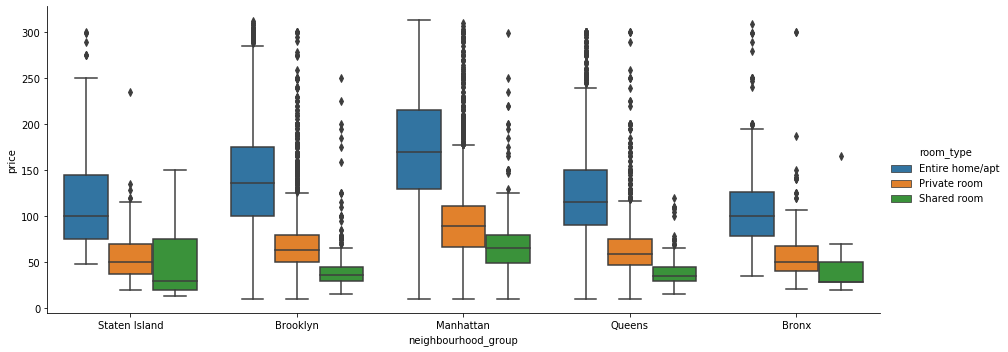

In [22]:
#Distribución de precios Según tipo de cuarto y ciudad.
sns.catplot(x="neighbourhood_group", y="price",hue="room_type",kind="box",hue_order = ['Entire home/apt','Private room','Shared room'],
            data=Airbnb2_NYC,aspect=2.5);


In [23]:
#Precios por tipo de alquiler, cuarto compartido, privado y apartamento completo. Divido por ciudad ordenado de precio promedio
#menor a mayor

Airbnb2_NYC.groupby(['neighbourhood_group','room_type'],as_index=True
).agg(
    
         Cantidad_de_locales=('room_type',"count"),    # cuenta la cantidad de ids que tiene un mismo host.
         Precio_Promedio=('price', "mean"),  # toma el promedio de los valores de precio para cada id, o espacio de renta de cada host.
         Precio_Minimo=('price', min),  # get the first date per group
         Precio_Maximo=('price', max),
         Precio_desv_estamdar=('price', std),
         Precio_25=('price',percentile(25)),
         Precio_50=('price',percentile(50)),
         Precio_75=('price',percentile(75))
).sort_values("Precio_Promedio")

Cantidad_de_locales  Precio_Promedio  \
neighbourhood_group room_type                                               
Bronx               Shared room                       42        39.238095   
Queens              Shared room                      149        41.939597   
Brooklyn            Shared room                      287        44.540070   
Bronx               Private room                     523        57.202677   
Staten Island       Private room                     159        57.584906   
                    Shared room                        5        57.600000   
Queens              Private room                    2669        63.860997   
Brooklyn            Private room                    7947        69.238832   
Manhattan           Shared room                      351        71.626781   
                    Private room                    6182        95.919605   
Bronx               Entire home/apt                  299       110.434783   
Staten Island       Entire home/apt                  148       119.939189   
Queens              Entire home/apt                 1689       129.115453   
Brooklyn            Entire home/apt                 7641       145.858657   
Manhattan           Entire home/apt                 8611       175.855301   

                                     Precio_Minimo  Precio_Maximo  \
neighbourhood_group room_type                                       
Bronx               Shared room                 20            165   
Queens              Shared room                 15            120   
Brooklyn            Shared room                 15            250   
Bronx               Private room                21            300   
Staten Island       Private room                20            235   
                    Shared room                 13            150   
Queens              Private room                10            300   
Brooklyn            Private room                10            300   
Manhattan           Shared room                 10            299   
                    Private room                10            310   
Bronx               Entire home/apt             35            309   
Staten Island       Entire home/apt             48            300   
Queens              Entire home/apt             10            300   
Brooklyn            Entire home/apt             10            312   
Manhattan           Entire home/apt             10            313   

                                     Precio_desv_estamdar  Precio_25  \
neighbourhood_group room_type                                          
Bronx               Shared room                 24.300767         28   
Queens              Shared room                 20.219147         30   
Brooklyn            Shared room                 31.322554         29   
Bronx               Private room                26.902282         40   
Staten Island       Private room                27.591345         37   
                    Shared room                 57.020172         20   
Queens              Private room                28.164298         47   
Brooklyn            Private room                30.574380         50   
Manhattan           Shared room                 36.450911         49   
                    Private room                43.859365         66   
Bronx               Entire home/apt             48.930216         79   
Staten Island       Entire home/apt             59.384969         75   
Queens              Entire home/apt             55.892662         90   
Brooklyn            Entire home/apt             55.832778        100   
Manhattan           Entire home/apt             58.544699        130   

                                     Precio_50  Precio_75  
neighbourhood_group room_type                              
Bronx               Shared room             28      49.75  
Queens              Shared room             35      45.00  
Brooklyn            Shared room             36      45.00  
Bronx               Private 

In [24]:
Airbnb2_NYC['latitude']=Airbnb2_NYC['latitude'].apply(lambda x: x.replace(',','.')).astype(float)
Airbnb2_NYC['longitude']=Airbnb2_NYC['longitude'].apply(lambda x: x.replace(',','.')).astype(float)
Airbnb2_NYC['reviews_per_month']=Airbnb2_NYC['reviews_per_month'].apply(lambda x: x.replace(',','.')).astype(float)

In [25]:
Airbnb2_NYC['latitude'].describe()

count    36702.000000
mean        40.727814
std          0.055757
min         40.506410
25%         40.688023
50%         40.720770
75%         40.763340
max         40.913060
Name: latitude, dtype: float64

In [26]:
Airbnb2_NYC['longitude'].describe()

count    36702.000000
mean       -73.949845
std          0.047034
min        -74.244420
25%        -73.981360
50%        -73.953680
75%        -73.933195
max        -73.712990
Name: longitude, dtype: float64

In [27]:
Airbnb2_NYC['minimum_nights'].describe() 

count    36702.000000
mean         5.876165
std         17.478570
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [28]:
Airbnb2_NYC['number_of_reviews'].describe()

count    36702.000000
mean        29.756961
std         48.740649
min          1.000000
25%          3.000000
50%         10.000000
75%         34.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [29]:
Airbnb2_NYC['reviews_per_month'].describe()

count    36702.000000
mean         1.376135
std          1.690506
min          0.010000
25%          0.190000
50%          0.710000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [30]:
Airbnb2_NYC['calculated_host_listings_count'].describe()

count    36702.000000
mean         4.831017
std         24.335749
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [31]:
Airbnb2_NYC['availability_365'].describe()

count    36702.000000
mean       111.756498
std        128.623520
min          0.000000
25%          0.000000
50%         50.000000
75%        220.000000
max        365.000000
Name: availability_365, dtype: float64

In [32]:
# Número de usuarios por barrio.
print(Airbnb2_NYC.groupby('neighbourhood')['neighbourhood'].count())

neighbourhood
Allerton            36
Arden Heights        4
Arrochar            19
Arverne             61
Astoria            699
                  ... 
Willowbrook          1
Windsor Terrace    125
Woodhaven           72
Woodlawn            11
Woodside           167
Name: neighbourhood, Length: 218, dtype: int64


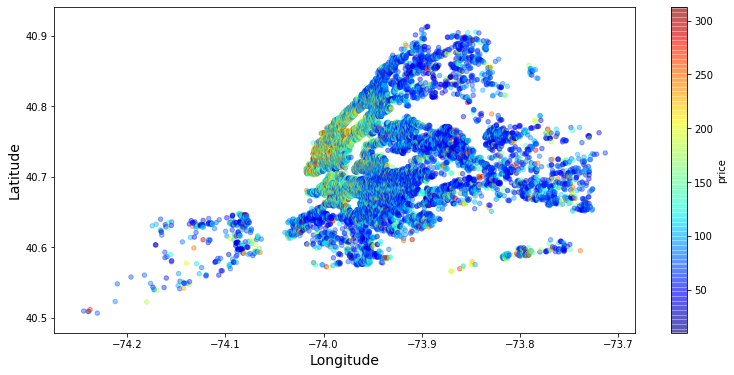

In [33]:
#Distribución de precios por longitud y latitud
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", x="longitude", y="latitude",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
#plt.clim(0, 500)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [34]:
from IPython.display import HTML
HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m16!1m12!1m3!1d387271.9713090274!2d-73.92203589264308!3d40.68361265720178!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!2m1!1smaps%20datasets%20new%20york%20view!5e0!3m2!1ses-419!2scr!4v1585763223704!5m2!1ses-419!2scr" width="600" height="450" frameborder="0" style="border:0;" allowfullscreen="" aria-hidden="false" tabindex="0"></iframe>')



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


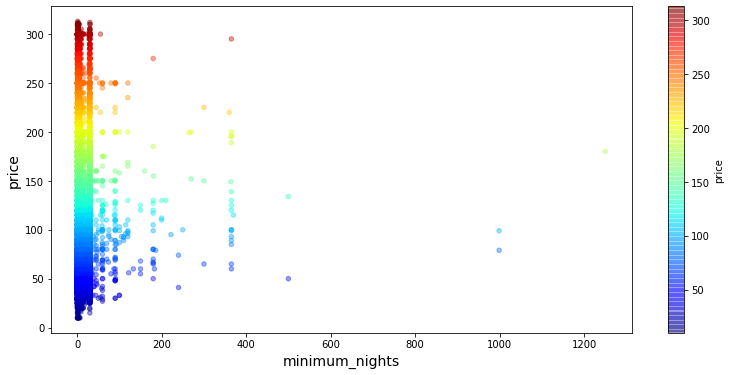

In [35]:
#generate a scatter plot map with minimum_nights and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", x="minimum_nights", y="price",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
scale_factorx = 1
scale_factory = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
#cmin, cmax = plt.clim()

plt.xlim(xmin * scale_factorx, xmax * scale_factorx)
plt.ylim(ymin * scale_factory, ymax * scale_factory)
plt.ylabel("price", fontsize=14)
plt.xlabel("minimum_nights", fontsize=14)
plt.show()

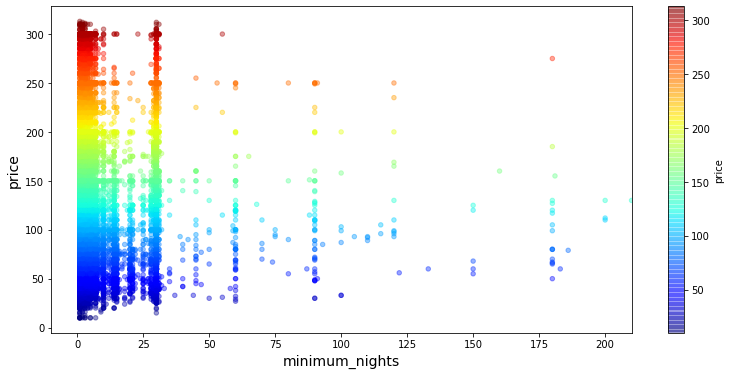

In [36]:
#generate a scatter plot map with minimum_nights and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", x="minimum_nights", y="price",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
#labels
scale_factorx = 0.16
scale_factory = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
#cmin, cmax = plt.clim()


plt.xlim(xmin * scale_factorx, xmax * scale_factorx)
plt.ylim(ymin * scale_factory, ymax * scale_factory)

plt.ylabel("price", fontsize=14)
plt.xlabel("minimum_nights", fontsize=14)
plt.show()

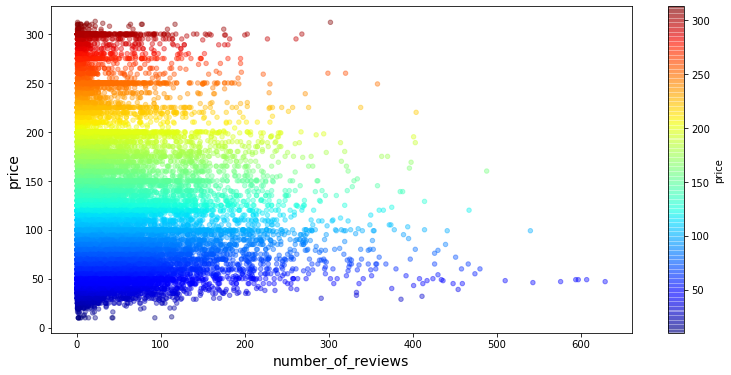

In [37]:
#generate a scatter plot map with number_of_reviews and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", y="price", x="number_of_reviews",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
plt.ylabel("price", fontsize=14)
plt.xlabel("number_of_reviews", fontsize=14)
plt.show()

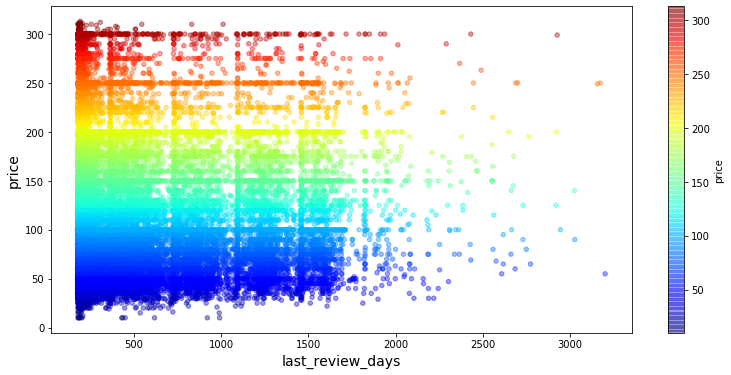

In [38]:
#generate a scatter plot map with last_review_days and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", y="price", x="last_review_days",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
plt.ylabel("price", fontsize=14)
plt.xlabel("last_review_days", fontsize=14)
plt.show()

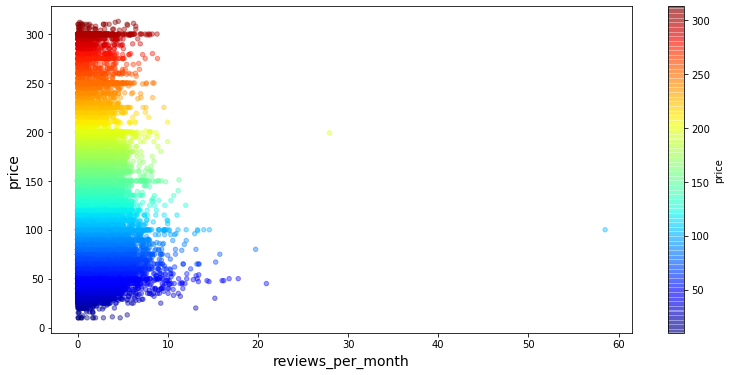

In [39]:
#generate a scatter plot map with reviews_per_month and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", y="price", x="reviews_per_month",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
plt.ylabel("price", fontsize=14)
plt.xlabel("reviews_per_month", fontsize=14)
plt.show()

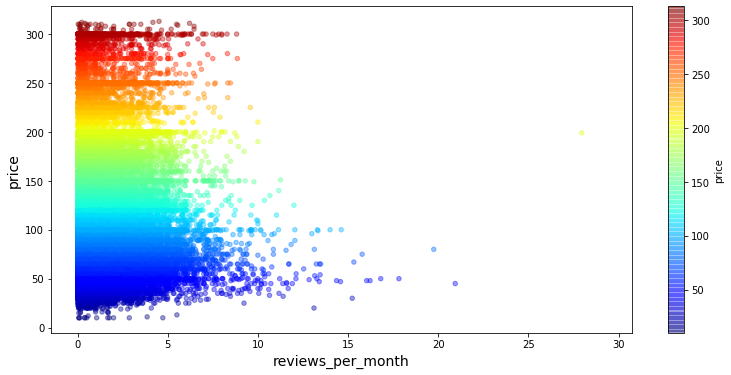

In [40]:
#generate a scatter plot map with reviews_per_month and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", y="price", x="reviews_per_month",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
scale_factorx = 0.5 #reescalado
scale_factory = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factorx, xmax * scale_factorx)
plt.ylim(ymin * scale_factory, ymax * scale_factory)
plt.ylabel("price", fontsize=14)
plt.xlabel("reviews_per_month", fontsize=14)
plt.show()

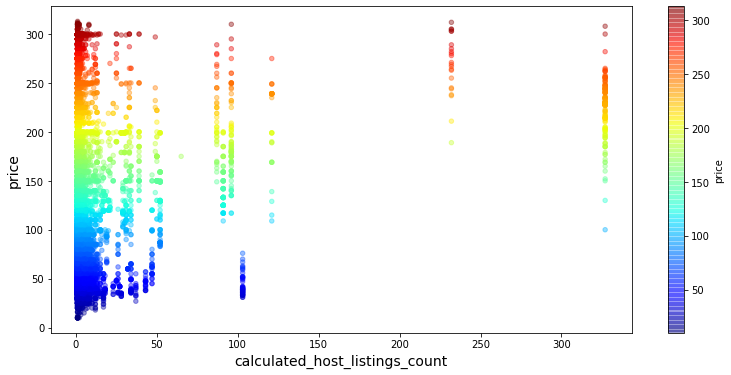

In [41]:
#generate a scatter plot map with calculated_host_listings_count and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", y="price", x="calculated_host_listings_count",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
plt.ylabel("price", fontsize=14)
plt.xlabel("calculated_host_listings_count", fontsize=14)
plt.show()

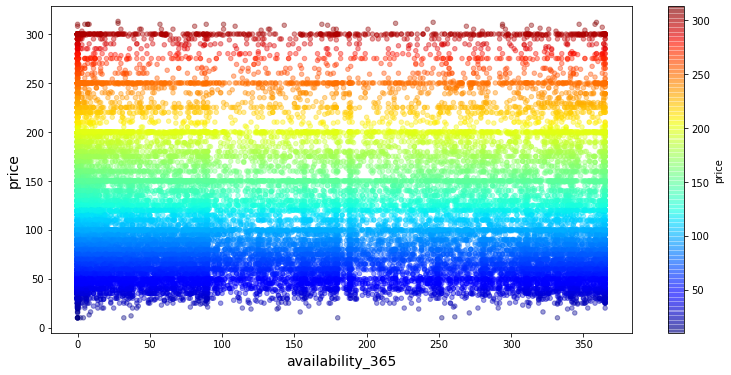

In [42]:
#generate a scatter plot map with the availability_365 and prices
fig, ax = plt.subplots()
Airbnb2_NYC.plot(kind="scatter", y="price", x="availability_365",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),ax=ax)
#labels
plt.ylabel("price", fontsize=14)
plt.xlabel("availability_365", fontsize=14)
plt.show()

# Modelado
## dataset: New York City Airbnb Open Data

In [43]:
Airbnb2_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36702 entries, 0 to 38842
Data columns (total 19 columns):
id                                36702 non-null int64
name                              36696 non-null object
host_id                           36702 non-null int64
host_name                         36686 non-null object
neighbourhood_group               36702 non-null object
neighbourhood                     36702 non-null object
latitude                          36702 non-null float64
longitude                         36702 non-null float64
room_type                         36702 non-null object
minimum_nights                    36702 non-null int64
number_of_reviews                 36702 non-null int64
last_review                       36702 non-null object
last_review_days                  36702 non-null int64
reviews_per_month                 36702 non-null float64
calculated_host_listings_count    36702 non-null int64
availability_365                  36702 non-null int64

In [44]:
## Selección de atributos

df1=Airbnb2_NYC.iloc[:,0:1]
df2=Airbnb2_NYC.iloc[:,4:10]
df3=Airbnb2_NYC.iloc[:,12:17]
#df4=Airbnb2_NYC.iloc[:,13:25]
#df5=Airbnb2_NYC.iloc[:,25:40]
features = pd.concat([df1,df2,df3],axis=1)

#
depVar = Airbnb2_NYC['price']
print('Summary of feature sample')

features.info()
depVar

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36702 entries, 0 to 38842
Data columns (total 12 columns):
id                                36702 non-null int64
neighbourhood_group               36702 non-null object
neighbourhood                     36702 non-null object
latitude                          36702 non-null float64
longitude                         36702 non-null float64
room_type                         36702 non-null object
minimum_nights                    36702 non-null int64
last_review_days                  36702 non-null int64
reviews_per_month                 36702 non-null float64
calculated_host_listings_count    36702 non-null int64
availability_365                  36702 non-null int64
price                             36702 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.9+ MB


0         70
1        299
2         85
3        275
4         75
        ... 
38838     75
38839     55
38840     60
38841     32
38842     65
Name: price, Length: 36702, dtype: int64

In [45]:
# Variables categoricas 'neighbourhood_group', 'room_type' y 'neighbourhood' en hot shot encoding.

dummies=pd.get_dummies(Airbnb2_NYC[['neighbourhood_group', 'room_type']],drop_first=True)
dummies2=pd.get_dummies(Airbnb2_NYC[['neighbourhood_group','room_type','neighbourhood', ]],drop_first=True)
print(dummies)

result = pd.concat([Airbnb2_NYC, dummies], axis=1)
result2 = pd.concat([Airbnb2_NYC, dummies2], axis=1)                
print(result)

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
38838                             0                              0   
38839                             0                              0   
38840                             0                              0   
38841                             0                              0   
38842                             0                              0   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                               0                                  1   
1              

In [46]:
#Se seleccionan los atributos para analisis de correlación y varianza.
df1=result.iloc[:,0:1]
df2=result.iloc[:,4:10]
df3=result.iloc[:,12:17]
#df4=Airbnb2_NYC.iloc[:,13:25]
df5=result.iloc[:,20:25]
features2 = pd.concat([df1,df2,df3,df5],axis=1)

#

depVar = Airbnb2_NYC['price']
print('Summary of feature sample')

features2.info()
depVar

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36702 entries, 0 to 38842
Data columns (total 17 columns):
id                                   36702 non-null int64
neighbourhood_group                  36702 non-null object
neighbourhood                        36702 non-null object
latitude                             36702 non-null float64
longitude                            36702 non-null float64
room_type                            36702 non-null object
minimum_nights                       36702 non-null int64
last_review_days                     36702 non-null int64
reviews_per_month                    36702 non-null float64
calculated_host_listings_count       36702 non-null int64
availability_365                     36702 non-null int64
price                                36702 non-null int64
neighbourhood_group_Manhattan        36702 non-null uint8
neighbourhood_group_Queens           36702 non-null uint8
neighbourhood_group_Staten Island    36702 n

0         70
1        299
2         85
3        275
4         75
        ... 
38838     75
38839     55
38840     60
38841     32
38842     65
Name: price, Length: 36702, dtype: int64

In [47]:
# Las correlaciones las alta es longitud contra precio, no se encuentran correlaciones altas entres atributos.
corrMat = features2.iloc[0:38843,1:25].corr()

print(corrMat)


                                   latitude  longitude  minimum_nights  \
latitude                           1.000000   0.094768        0.024633   
longitude                          0.094768   1.000000       -0.057532   
minimum_nights                     0.024633  -0.057532        1.000000   
last_review_days                   0.023250  -0.112026        0.050537   
reviews_per_month                 -0.012094   0.152462       -0.122722   
calculated_host_listings_count     0.008548  -0.086148        0.081925   
availability_365                  -0.027578   0.117060        0.105010   
price                              0.055676  -0.304604        0.019892   
neighbourhood_group_Manhattan      0.597576  -0.409878        0.059832   
neighbourhood_group_Queens         0.025135   0.624249       -0.035598   
neighbourhood_group_Staten Island -0.193535  -0.305414       -0.012996   
room_type_Private room             0.023925   0.157494       -0.074100   
room_type_Shared room              0.0

In [48]:
covMat=features2.iloc[0:38843,1:25].cov() 
print(covMat)

                                   latitude  longitude  minimum_nights  \
latitude                           0.003109   0.000249        0.024006   
longitude                          0.000249   0.002212       -0.047296   
minimum_nights                     0.024006  -0.047296      305.500400   
last_review_days                   0.537325  -2.183957      366.127031   
reviews_per_month                 -0.001140   0.012122       -3.626156   
calculated_host_listings_count     0.011599  -0.098605       34.847006   
availability_365                  -0.197785   0.708170      236.078725   
price                              0.200596  -0.925761       22.467052   
neighbourhood_group_Manhattan      0.016404  -0.009491        0.514846   
neighbourhood_group_Queens         0.000460   0.009637       -0.204214   
neighbourhood_group_Staten Island -0.000991  -0.001319       -0.020854   
room_type_Private room             0.000666   0.003700       -0.646859   
room_type_Shared room              0.0

room_type_Shared room                           0.022208  


In [49]:
from sklearn.preprocessing import scale 


df1=result.iloc[:,6:8]
df2=result.iloc[:,9:10]
df3=result.iloc[:,12:16]
#df4=Airbnb2_NYC.iloc[:,13:25]
df4=result.iloc[:,20:25]
features3 = pd.concat([df1,df2,df3,df4],axis=1)


df11=result.iloc[:,7:8]
#df2=result.iloc[:,9:10]
df31=result.iloc[:,15:16]
df51=result.iloc[:,20:21]
df41=result.iloc[:,22:25]
features5 = pd.concat([df11,df31,df51,df41],axis=1)

df000=result2.iloc[:,6:8]
df0000=result2.iloc[:,9:10]
df00000=result2.iloc[:,20:25]
df111=result2.iloc[:,12:16]
df222=result2.iloc[:,60:61]
df333=result2.iloc[:,70:72]
#df4=Airbnb2_NYC.iloc[:,13:25]
df444=result2.iloc[:,80:81]
df555=result2.iloc[:,90:91]
df666=result2.iloc[:,120:121]
df777=result2.iloc[:,188:189]
df888=result2.iloc[:,223:224]
features333 = pd.concat([df000,df0000,df00000,df111,df222,df333,df444,df555,df666,df777,df888],axis=1)

depVar3 = Airbnb2_NYC['price']
print('Summary of feature sample')

features3.info()
features5.info()
features333.info()
depVar3


#Training Set (Feature Space: X Training)
X= scale(features3[: 38843])
X2= scale(features5[: 38843])
X3= scale(features333[: 38843])


y= depVar3[: 38843]


Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36702 entries, 0 to 38842
Data columns (total 12 columns):
latitude                             36702 non-null float64
longitude                            36702 non-null float64
minimum_nights                       36702 non-null int64
last_review_days                     36702 non-null int64
reviews_per_month                    36702 non-null float64
calculated_host_listings_count       36702 non-null int64
availability_365                     36702 non-null int64
neighbourhood_group_Manhattan        36702 non-null uint8
neighbourhood_group_Queens           36702 non-null uint8
neighbourhood_group_Staten Island    36702 non-null uint8
room_type_Private room               36702 non-null uint8
room_type_Shared room                36702 non-null uint8
dtypes: float64(3), int64(4), uint8(5)
memory usage: 3.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36702 entries, 0 to 38842
Data columns (total 6 colum

In [50]:
from sklearn.model_selection import train_test_split

#Se hace la división para entrenamiento y prueba.

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=6)


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y,test_size=0.30, random_state=6)


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y,test_size=0.30, random_state=6)


#Se revisa el cambio:

X_train3.shape, X_test3.shape

y_train3.shape, y_test3.shape

((25691,), (11011,))

In [51]:
print(X_train3)
print(X_test3)



[[-0.08723379 -0.69344055 -0.10734233 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [-0.3297158  -0.01689454 -0.16455603 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [-0.83010398  0.24653742 -0.16455603 ... -0.01650875 -0.09093406
  -0.1936811 ]
 ...
 [-0.64967727  0.81082187 -0.16455603 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [-0.20865415 -0.9015922  -0.10734233 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [-0.49489771  0.75341539  0.06429877 ... -0.01650875 -0.09093406
  -0.1936811 ]]
[[-0.04042329  0.18721739 -0.27898342 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [-1.0307973  -0.03921928 -0.16455603 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [-0.26568764 -0.85077683 -0.16455603 ... -0.01650875 -0.09093406
  -0.1936811 ]
 ...
 [ 0.33549557 -1.08529294 -0.22176972 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [ 1.38326178 -0.30647834 -0.22176972 ... -0.01650875 -0.09093406
  -0.1936811 ]
 [-0.73468946 -0.11512341 -0.10734233 ... -0.01650875 -0.09093406
  -0.1936811 ]]


In [52]:
#Se prueban tres distintos grupos de atributos X,X2,X3
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regression = LinearRegression(normalize=True) 
regression.fit(X_train,y_train) 
y_train_pred=regression.predict(X_train)
y_test_pred=regression.predict(X_test)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train, y_pred=y_train_pred)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test, y_pred=y_test_pred))
print('Test r2_score: %.2f' % r2_score( y_true=y_test, y_pred=y_test_pred))



Train mean squared error: 2128.33
Test mean squared error: 2102.06
Test r2_score: 0.49


In [53]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

regression4 = LinearRegression(normalize=True) 
regression4.fit(X_train2,y_train2) 
y_train_pred2=regression4.predict(X_train2)
y_test_pred2=regression4.predict(X_test2)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train2, y_pred=y_train_pred2)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test2, y_pred=y_test_pred2))
print('Test r2_score: %.2f' % r2_score( y_true=y_test2, y_pred=y_test_pred2))

Train mean squared error: 2157.58
Test mean squared error: 2143.28
Test r2_score: 0.48


In [54]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



regression5 = LinearRegression(normalize=True) 
regression5.fit(X_train3,y_train3) 
y_train_pred3=regression5.predict(X_train3)
y_test_pred3=regression5.predict(X_test3)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train3, y_pred=y_train_pred3)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test3, y_pred=y_test_pred3))
print('Test r2_score: %.2f' % r2_score( y_true=y_test3, y_pred=y_test_pred3))

Train mean squared error: 2124.97
Test mean squared error: 2099.96
Test r2_score: 0.49


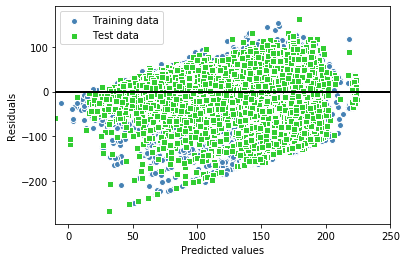

In [55]:
plt.scatter(y_train_pred3,  y_train_pred3 - y_train,
             c='steelblue', marker='o', edgecolor='white',
             label='Training data')
plt.scatter(y_test_pred3,  y_test_pred3 - y_test,
             c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=250, color='black', lw=2)
plt.xlim([-10, 250])
plt.show()

 

In [56]:
# se verifican la importancia de los atributos en el modelo
from sklearn.feature_selection import RFECV 
selector = RFECV(estimator=regression, cv=10, scoring='neg_mean_squared_error') 
selector.fit(X, y) 
print("Optimal number of features : %d" % selector.n_features_)
print([selector.support_])

Optimal number of features : 6
[array([False,  True, False, False, False, False,  True,  True, False,
        True,  True,  True])]


In [57]:
from sklearn.feature_selection import RFECV 
selector = RFECV(estimator=regression, cv=10, scoring='neg_mean_squared_error') 
selector.fit(X2, y) 
print("Optimal number of features : %d" % selector.n_features_)
print([selector.support_])

Optimal number of features : 6
[array([ True,  True,  True,  True,  True,  True])]


In [58]:
from sklearn.feature_selection import RFECV 
selector = RFECV(estimator=regression, cv=10, scoring='neg_mean_squared_error') 
selector.fit(X3, y) 
print("Optimal number of features : %d" % selector.n_features_)
print([selector.support_])

Optimal number of features : 8
[array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])]


In [59]:
from sklearn.model_selection import cross_val_score, KFold 
import numpy as np 
regression2 = LinearRegression(normalize=True) 
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1) 
scores = cross_val_score(regression2, X3, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1) 
print('Folds: %i, mean squared error: %.2f std: %.2f' % (len(scores),np.mean(np.abs(scores)),np.std(scores)))


Folds: 10, mean squared error: 2119.03 std: 63.26


In [60]:
# Se selecciona X3 para los modelos restantes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric= 'minkowski', p=2)
grid = {'n_neighbors': range(8,11), 'weights': ['uniform', 'distance'], 'p': [1,2]} 
score_metric = 'accuracy'
#grid = {'n_neighbors': [10], 'weights': ['uniform'], 'p': [2]} 

search = GridSearchCV(estimator=classifier, param_grid=grid, scoring=score_metric, n_jobs=1, refit=True,return_train_score=True, cv=10) 
search.fit(X_train3,y_train3)




print ('Number of tested models: %i' % np.prod([len(grid[element]) for element in grid])) 


print('Baseline with default parameters: %.3f' % np.mean(cross_val_score(classifier, X_train3, y_train3, cv=10, scoring=score_metric, n_jobs=1)))






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Number of tested models: 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Baseline with default parameters: 0.046


In [61]:
y_train_pred4=search.predict(X_train3)
y_test_pred4=search.predict(X_test3)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train3, y_pred=y_train_pred4)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test3, y_pred=y_test_pred4))
print('Test r2_score: %.2f' % r2_score( y_true=y_test3, y_pred=y_test_pred4))

Train mean squared error: 0.00
Test mean squared error: 2940.91
Test r2_score: 0.29


In [62]:
# Necessary imports 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 4) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
  
logreg_cv.fit(X_train3, y_train3) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

Tuned Logistic Regression Parameters: {'C': 0.21544346900318823}
Best score is 0.07609668755595345


In [63]:
y_train_pred6=logreg_cv.predict(X_train3)
y_test_pred6=logreg_cv.predict(X_test3)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train3, y_pred=y_train_pred6)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test3, y_pred=y_test_pred6))
print('Test r2_score: %.2f' % r2_score( y_true=y_test3, y_pred=y_test_pred6))

Train mean squared error: 2445.17
Test mean squared error: 2408.53
Test r2_score: 0.42


In [64]:
# Decision Tree classifier 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  

param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  

tree = DecisionTreeClassifier() 
  

tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train3, y_train3) 
  

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.07064730839593632


In [65]:
y_train_pred7=tree_cv.predict(X_train3)
y_test_pred7=tree_cv.predict(X_test3)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train3, y_pred=y_train_pred7)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test3, y_pred=y_test_pred7))
print('Test r2_score: %.2f' % r2_score( y_true=y_test3, y_pred=y_test_pred7))

Train mean squared error: 2821.20
Test mean squared error: 2718.97
Test r2_score: 0.34


In [66]:
   
import warnings
warnings.filterwarnings("ignore")
    

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8] 
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train3, y_train3)    

    # Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")



 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.5759341891121909

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.5}



In [67]:
y_train_pred5=grid.predict(X_train3)
y_test_pred5=grid.predict(X_test3)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train3, y_pred=y_train_pred5)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test3, y_pred=y_test_pred5))
print('Test r2_score: %.2f' % r2_score( y_true=y_test3, y_pred=y_test_pred5))

Train mean squared error: 1457.54
Test mean squared error: 1731.96
Test r2_score: 0.58


In [68]:
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)


 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [69]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np

parameters2 = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters2)
clf.fit(X_train3,y_train3)
clf.best_params_

{'C': 10, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [70]:
y_train_pred8=clf.predict(X_train3)
y_test_pred8=clf.predict(X_test3)
print('Train mean squared error: %.2f' % mean_squared_error( y_true=y_train3, y_pred=y_train_pred8)) 
print('Test mean squared error: %.2f' % mean_squared_error( y_true=y_test3, y_pred=y_test_pred8))
print('Test r2_score: %.2f' % r2_score( y_true=y_test3, y_pred=y_test_pred8))

Train mean squared error: 2208.04
Test mean squared error: 2150.27
Test r2_score: 0.48
